In [199]:
import numpy as np
import functools
import time
from matplotlib import pyplot as plt
from sklearn import datasets

data = np.array([[1,5],
                [3,6],
                [4,2],
                [3,7],
                [5,8],
                [25,31],
                [27,33],
                [23,25],
                [31,28],
                [33,31],
                [55,54],
                [59,51],
                [63,65],
                [56,62],
                [61,61]])

data_1d = np.array([1,5,3,2,6,25,26,24,27,28,53,52,64,62,51])
print(data_1d.ndim)
print(data.ndim)
#data_1d = data_1d.reshape(-1,1)
stack = np.column_stack([data_1d.reshape(-1,1),np.zeros(np.shape(data_1d))])
stack

1
2


array([[ 1.,  0.],
       [ 5.,  0.],
       [ 3.,  0.],
       [ 2.,  0.],
       [ 6.,  0.],
       [25.,  0.],
       [26.,  0.],
       [24.,  0.],
       [27.,  0.],
       [28.,  0.],
       [53.,  0.],
       [52.,  0.],
       [64.,  0.],
       [62.,  0.],
       [51.,  0.]])

In [200]:
# def timer(func):
#     @functools.wraps(func)
#     def wrapper_timer(*args, **kwargs):
#         start = time.perf_counter()
#         #'value' is the function being timed
#         value = func(*args, **kwargs)
#         end = time.perf_counter()
#         print(f'Finished {func.__name__!r} in {end-start:.8f} seconds!')
#         return value
#     return wrapper_timer

[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), array([33, 31]), array([61, 61]), array([5, 8]), array([55, 54])]
[array([3, 6]), 

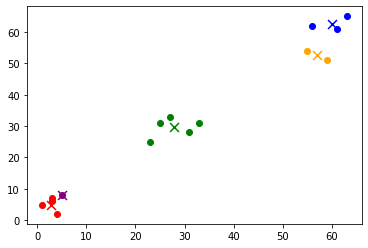

In [212]:
class k_means():
    def __init__(self, data, k):
        self.data = data
        self.k = k
    def ini_centroids(self, data, k):
        lst = []
        data_len = len(self.data)
        choices = np.random.choice(range(data_len), size=self.k, replace=False)
        for i in choices:
            lst.append([self.data[i]])
        #print('centroids = ' + str(lst))
        return [i[0] for i in lst]
    def clusters(self,centroids):
        #print('cluster centroids = ' + str(centroids))
        cluster_vals = [[] for i in range(len(centroids))]
        #print(cluster_vals)
        for y in self.data:
            distances = []
            for i in range(len(centroids)):
                distances.append(np.linalg.norm(y - centroids[i]))
            print(centroids)
            idx = distances.index(min(distances))
            cluster_vals[idx].append(y)
        print(cluster_vals)               
        return cluster_vals
    def update(self,clust_vals):
        cluster_means = []
        for x in clust_vals:
            cluster_means.append(sum(x[::])/len(x))
            #print('x = ' + str(x))

        #print('means = ' + str(cluster_means))
        return self.clusters(cluster_means)
    #@timer
    def k_means_func(self):
        centroids = self.ini_centroids(self.data, self.k)
        cluster_values = self.clusters(centroids)
        updates = self.update(cluster_values)
        count = 0
        for i in range(len(updates)):
            if not np.array_equal(np.round(updates[i][0],3), np.round(self.update(updates)[i][0],3)):
                count += 1
                updates = self.update(updates)
                #print(updates)
        #print('It took ' + str(count) + ' cycles!')
        return updates
    def k_means_repeat(self):
        clusters = []
        variances = []
        for r in range(10):
            clusters.append(self.k_means_func())
        for x in clusters:
            count = 0
            for i in range(self.k):
                count += np.var(x[i])
                #print(np.var(x[i]))
            #print(count)
            variances.append(count)
        #print(variances)
        return clusters[variances.index(np.min(variances))]
    def plot(self):
        test_plot = self.k_means_func()
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print('test array = ' + str(np.mean(test_array[0][:,0])))
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
    def plot_2(self):
        test_plot = self.k_means_repeat()
        #print(test_plot)
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print(test_array)
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
        
test = k_means(data, 5)    
#test.k_means_repeat()

test.plot()

In [ ]:
one_d = k_means(stack,3)
one_d.plot_2()

In [ ]:
iris = datasets.load_iris()
#iris['data']

In [ ]:
iris_k = k_means(iris['data'],3)
iris_k.k_means_repeat()